In [2]:
import feather

In [4]:
import pandas as pd
import dask.dataframe as dd
import fastparquet
from dask import visualize

In [5]:
csv_file = 'yellow_tripdata_2017-01.csv'
csv_file_on = 'yellow_tripdata_2017-01'

Wall time: 661 ms


,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,0,1,2017-01-09 11:13:28,2017-01-09 11:25:45,1,3.30,1,N,263,161,1,12.5,0.0,0.5,2.00,0.0,0.3,15.30
1,1,1,2017-01-09 11:32:27,2017-01-09 11:36:01,1,0.90,1,N,186,234,1,5.0,0.0,0.5,1.45,0.0,0.3,7.25
2,2,1,2017-01-09 11:38:20,2017-01-09 11:42:05,1,1.10,1,N,164,161,1,5.5,0.0,0.5,1.00,0.0,0.3,7.30
3,3,1,2017-01-09 11:52:13,2017-01-09 11:57:36,1,1.10,1,N,236,75,1,6.0,0.0,0.5,1.70,0.0,0.3,8.50
4,4,2,2017-01-01 00:00:00,2017-01-01 00:00:00,1,0.02,2,N,249,234,2,52.0,0.0,0.5,0.00,0.0,0.3,52.80


In [6]:
%time dd_to_pd_frame = dd.read_csv(csv_file, blocksize=25e6) #.compute()  # 25MB chunks  

Wall time: 51 ms


In [7]:
 dd_to_pd_frame.to_csv('./data/yellow_tripdata_2017-01_*.csv')  

['./data/yellow_tripdata_2017-01_00.csv',
 './data/yellow_tripdata_2017-01_01.csv',
 './data/yellow_tripdata_2017-01_02.csv',
 './data/yellow_tripdata_2017-01_03.csv',
 './data/yellow_tripdata_2017-01_04.csv',
 './data/yellow_tripdata_2017-01_05.csv',
 './data/yellow_tripdata_2017-01_06.csv',
 './data/yellow_tripdata_2017-01_07.csv',
 './data/yellow_tripdata_2017-01_08.csv',
 './data/yellow_tripdata_2017-01_09.csv',
 './data/yellow_tripdata_2017-01_10.csv',
 './data/yellow_tripdata_2017-01_11.csv',
 './data/yellow_tripdata_2017-01_12.csv',
 './data/yellow_tripdata_2017-01_13.csv',
 './data/yellow_tripdata_2017-01_14.csv',
 './data/yellow_tripdata_2017-01_15.csv',
 './data/yellow_tripdata_2017-01_16.csv',
 './data/yellow_tripdata_2017-01_17.csv',
 './data/yellow_tripdata_2017-01_18.csv',
 './data/yellow_tripdata_2017-01_19.csv',
 './data/yellow_tripdata_2017-01_20.csv',
 './data/yellow_tripdata_2017-01_21.csv',
 './data/yellow_tripdata_2017-01_22.csv',
 './data/yellow_tripdata_2017-01_2

In [25]:
%time pd_frame = pd.read_csv('./data\\yellow_tripdata_2017-01_00.csv')
pd_frame.head()

Wall time: 639 ms


,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,0,1,2017-01-09 11:13:28,2017-01-09 11:25:45,1,3.30,1,N,263,161,1,12.5,0.0,0.5,2.00,0.0,0.3,15.30
1,1,1,2017-01-09 11:32:27,2017-01-09 11:36:01,1,0.90,1,N,186,234,1,5.0,0.0,0.5,1.45,0.0,0.3,7.25
2,2,1,2017-01-09 11:38:20,2017-01-09 11:42:05,1,1.10,1,N,164,161,1,5.5,0.0,0.5,1.00,0.0,0.3,7.30
3,3,1,2017-01-09 11:52:13,2017-01-09 11:57:36,1,1.10,1,N,236,75,1,6.0,0.0,0.5,1.70,0.0,0.3,8.50
4,4,2,2017-01-01 00:00:00,2017-01-01 00:00:00,1,0.02,2,N,249,234,2,52.0,0.0,0.5,0.00,0.0,0.3,52.80


In [9]:
import dask.dataframe as dd
from dask import delayed
from glob import glob
import os

In [23]:
files = glob('./data/yellow_tripdata_2017-*')

In [24]:
files

['./data\\yellow_tripdata_2017-01_00.csv',
 './data\\yellow_tripdata_2017-01_01.csv',
 './data\\yellow_tripdata_2017-01_02.csv',
 './data\\yellow_tripdata_2017-01_03.csv',
 './data\\yellow_tripdata_2017-01_04.csv',
 './data\\yellow_tripdata_2017-01_05.csv',
 './data\\yellow_tripdata_2017-01_06.csv',
 './data\\yellow_tripdata_2017-01_07.csv',
 './data\\yellow_tripdata_2017-01_08.csv',
 './data\\yellow_tripdata_2017-01_09.csv',
 './data\\yellow_tripdata_2017-01_10.csv',
 './data\\yellow_tripdata_2017-01_11.csv',
 './data\\yellow_tripdata_2017-01_12.csv',
 './data\\yellow_tripdata_2017-01_13.csv',
 './data\\yellow_tripdata_2017-01_14.csv',
 './data\\yellow_tripdata_2017-01_15.csv',
 './data\\yellow_tripdata_2017-01_16.csv',
 './data\\yellow_tripdata_2017-01_17.csv',
 './data\\yellow_tripdata_2017-01_18.csv',
 './data\\yellow_tripdata_2017-01_19.csv',
 './data\\yellow_tripdata_2017-01_20.csv',
 './data\\yellow_tripdata_2017-01_21.csv',
 './data\\yellow_tripdata_2017-01_22.csv',
 './data\\y

In [46]:
import dask
@dask.delayed
def load(filename):
    return pd.read_csv(filename)

@dask.delayed
def process(data):
    return data.total_amount.sum()

@dask.delayed
def save(data):
    print(data)

In [47]:
files = files[:5]

In [48]:
files

['./data\\yellow_tripdata_2017-01_00.csv',
 './data\\yellow_tripdata_2017-01_01.csv',
 './data\\yellow_tripdata_2017-01_02.csv',
 './data\\yellow_tripdata_2017-01_03.csv',
 './data\\yellow_tripdata_2017-01_04.csv']

In [49]:
lazy_dataframes = []
for filename in files:    
    #filename = os.path.join(directory, symbol)
    #df = pd.read_csv('yellow_tripdata_2017-01.csv')
    df = load(filename)
    #df = delayed(feather.read_dataframe)(filename)
#     directory = '2016-01-01'
    #df = delayed(pd.DataFrame.assign)(df)
    rs = process(df)
    lazy_dataframes.append(rs)

In [50]:
lazy_dataframes[0]

Delayed('process-08995602-fa9f-47b2-90c1-eb41653d3e30')

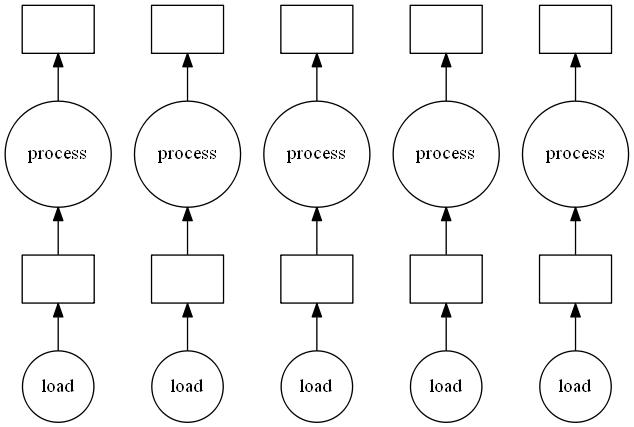

In [51]:
visualize(*lazy_dataframes[:5])

In [52]:
# sums = [df.total_amount.sum() for df in lazy_dataframes]
sums = lazy_dataframes
total = delayed(sum)(sums)


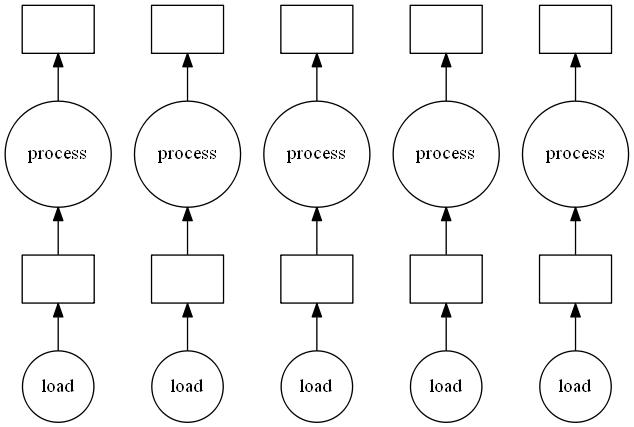

In [53]:
visualize(*lazy_dataframes)

In [54]:
total.compute()

22727546.150000002

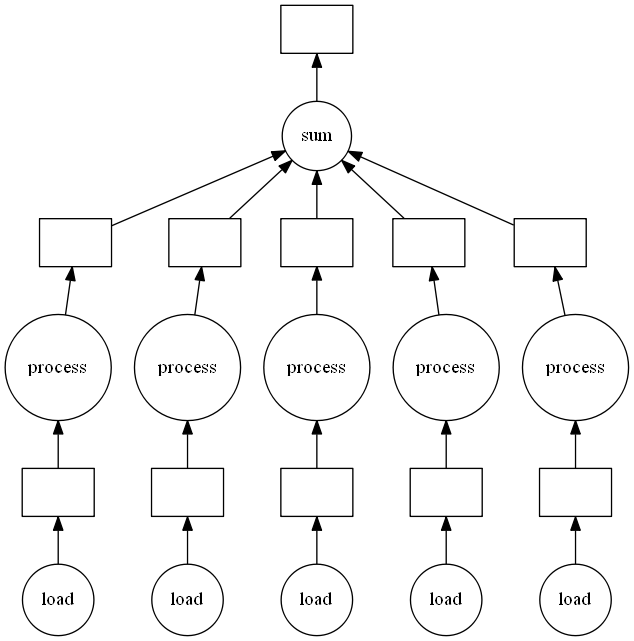

In [55]:
visualize(total)